# Ads Appeal Surveys

In [1]:
import pandas as pd 

design_1 = pd.read_csv('../data/surveys/survey_results_design_1.csv')  
design_2 = pd.read_csv('../data/surveys/survey_results_design_2.csv') 

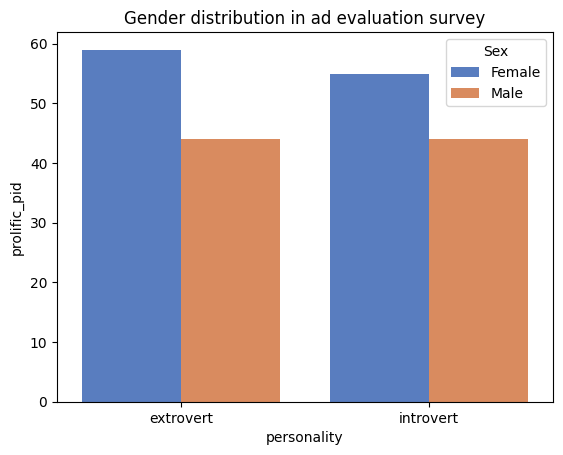

In [ ]:
# Gender distribution
import seaborn as sns 
import matplotlib.pyplot as plt

# Set the style
sns.set_style(style="whitegrid")

# The same users rated both designs (in the same survey)
group = design_1.groupby(['personality' , 'Sex'])['prolific_pid'].count().reset_index()
sns.barplot(group, x='personality', y='prolific_pid', hue='Sex', palette='muted')
plt.title('Gender distribution in ad evaluation survey')
plt.show()

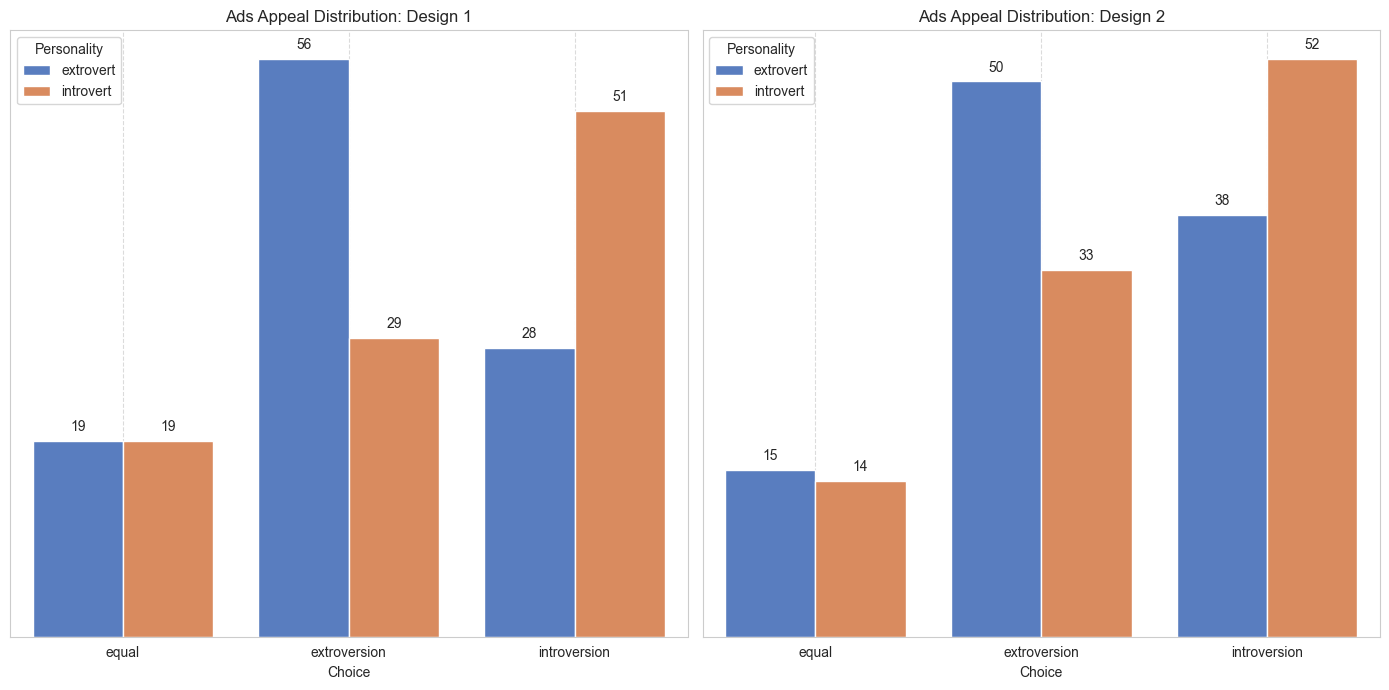

In [3]:
# Ads Appeal Choices Visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

def plot_ads_appeal(design_df, design_label, subplot_idx):
    group = (
        design_df
        .pivot_table(index=['topic', 'personality'], columns='choice', aggfunc='size', fill_value=0)
        .stack()
        .reset_index()
        .rename({0: 'count'}, axis=1)
    )
    plt.subplot(1, 2, subplot_idx)
    sns.barplot(data=group, x='choice', y='count', hue='personality', palette='muted')
    for p in plt.gca().patches:
        if p.get_height() > 0:
            plt.gca().annotate(
                f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points'
            )
    plt.title(f'Ads Appeal Distribution: {design_label}')
    plt.xlabel('Choice')
    plt.yticks([])
    plt.ylabel('')
    plt.legend(title='Personality')
    plt.grid(True, linestyle='--', alpha=0.7)

plt.figure(figsize=(14, 7))
plot_ads_appeal(design_1, "Design 1", 1)
plot_ads_appeal(design_2, "Design 2", 2)
plt.tight_layout()
plt.show()


# Ad Appeal: Split testing
## Psychometric-based audiences

In [19]:
import pandas as pd 
from statsmodels.stats.proportion import proportions_ztest

def run_ztest(df, audience, profiling, design):
    subset = df[
        (df['Audience Personality'] == audience) &
        (df['Profiling Method'] == profiling) &
        (df['Ad Design'] == design)
    ]
    introvert_total = subset[subset['Ad Type'] == 'Introvert']['UserID'].count()
    extrovert_total = subset[subset['Ad Type'] == 'Extrovert']['UserID'].count()
    introvert_engaged = subset[(subset['Ad Type'] == 'Introvert') & (subset['Engaged'] == 1)]['UserID'].count()
    extrovert_engaged = subset[(subset['Ad Type'] == 'Extrovert') & (subset['Engaged'] == 1)]['UserID'].count()
    success = [introvert_engaged, extrovert_engaged]
    n = [introvert_total, extrovert_total]
    stat, p_value = proportions_ztest(success, n)
    return stat, p_value

df = pd.read_csv('../data/user_behavior/controlled_user_behavior_results_design_1.csv')

# Design 1
stat, p_value = run_ztest(df, 'Extrovert', 'Website', 'Design 1')
print(f"Design 1 Extroverts : Z-statistic = {stat}, p-value = {p_value}")
stat, p_value = run_ztest(df, 'Introvert', 'Website', 'Design 1')
print(f"Design 1 Introverts : Z-statistic = {stat}, p-value = {p_value}")

df = pd.read_csv('../data/user_behavior/controlled_user_behavior_results_design_2.csv')

# Design 2
stat, p_value = run_ztest(df, 'Extrovert', 'Website', 'Design 2')
print(f"Design 2 Extroverts : Z-statistic = {stat}, p-value = {p_value}")
stat, p_value = run_ztest(df, 'Introvert', 'Website', 'Design 2')
print(f"Design 2 Introverts : Z-statistic = {stat}, p-value = {p_value}")


Design 1 Extroverts : Z-statistic = 1.1100286327928761, p-value = 0.2669866883437262
Design 1 Introverts : Z-statistic = 0.9253553021944342, p-value = 0.3547811210613545
Design 2 Extroverts : Z-statistic = -0.40837730860026816, p-value = 0.6829966899792199
Design 2 Introverts : Z-statistic = -1.3995179153418527, p-value = 0.16165772981758753


In [20]:
from statsmodels.stats.multitest import multipletests

# Extroverts 
p_values = [0.2669866883437262, 0.6829966899792199] 

# Holm-Bonferroni correction
rejected_holm, corrected_pvals_holm, _, _ = multipletests(p_values, alpha=0.05, method='holm')
print("Holm-corrected p-values (extroverts):", corrected_pvals_holm)

# Introverts 
p_values = [0.3547811210613545, 0.16165772981758753] 

# Holm-Bonferroni correction
rejected_holm, corrected_pvals_holm, _, _ = multipletests(p_values, alpha=0.05, method='holm')
print("Holm-corrected p-values (introverts):", corrected_pvals_holm)


Holm-corrected p-values (extroverts): [0.53397338 0.68299669]
Holm-corrected p-values (introverts): [0.35478112 0.32331546]


## Behavioral-based audiences

In [21]:
import pandas as pd 
from statsmodels.stats.proportion import proportions_ztest

def run_ztest(df, audience, profiling, design):
    subset = df[
        (df['Audience Personality'] == audience) &
        (df['Profiling Method'] == profiling) &
        (df['Ad Design'] == design)
    ]
    introvert_total = subset[subset['Ad Type'] == 'Introvert']['UserID'].count()
    extrovert_total = subset[subset['Ad Type'] == 'Extrovert']['UserID'].count()
    introvert_engaged = subset[(subset['Ad Type'] == 'Introvert') & (subset['Engaged'] == 1)]['UserID'].count()
    extrovert_engaged = subset[(subset['Ad Type'] == 'Extrovert') & (subset['Engaged'] == 1)]['UserID'].count()
    success = [introvert_engaged, extrovert_engaged]
    n = [introvert_total, extrovert_total]
    stat, p_value = proportions_ztest(success, n)
    return stat, p_value

df = pd.read_csv('../data/user_behavior/controlled_user_behavior_results_design_1.csv')

# Design 1
stat, p_value = run_ztest(df, 'Extrovert', 'Behavioral', 'Design 1')
print(f"Design 1 Extroverts : Z-statistic = {stat}, p-value = {p_value}")
stat, p_value = run_ztest(df, 'Introvert', 'Behavioral', 'Design 1')
print(f"Design 1 Introverts : Z-statistic = {stat}, p-value = {p_value}")

df = pd.read_csv('../data/user_behavior/controlled_user_behavior_results_design_2.csv')

# Design 2
stat, p_value = run_ztest(df, 'Extrovert', 'Behavioral', 'Design 2')
print(f"Design 2 Extroverts : Z-statistic = {stat}, p-value = {p_value}")
stat, p_value = run_ztest(df, 'Introvert', 'Behavioral', 'Design 2')
print(f"Design 2 Introverts : Z-statistic = {stat}, p-value = {p_value}")


Design 1 Extroverts : Z-statistic = 1.0559845368175251, p-value = 0.29097527956351954
Design 1 Introverts : Z-statistic = 1.016674078496259, p-value = 0.3093085009321985
Design 2 Extroverts : Z-statistic = 1.6411072304708976, p-value = 0.10077515810505108
Design 2 Introverts : Z-statistic = -2.1875490735709993, p-value = 0.02870246488310135


In [22]:
from statsmodels.stats.multitest import multipletests

# Extroverts 
p_values = [0.29097527956351954, 0.10077515810505108] 

# Holm-Bonferroni correction
rejected_holm, corrected_pvals_holm, _, _ = multipletests(p_values, alpha=0.05, method='holm')
print("Holm-corrected p-values (extroverts):", corrected_pvals_holm)

# Introverts 
p_values = [0.3093085009321985, 0.02870246488310135] 

# Holm-Bonferroni correction
rejected_holm, corrected_pvals_holm, _, _ = multipletests(p_values, alpha=0.05, method='holm')
print("Holm-corrected p-values (introverts):", corrected_pvals_holm)


Holm-corrected p-values (extroverts): [0.29097528 0.20155032]
Holm-corrected p-values (introverts): [0.3093085  0.05740493]
